In [246]:
%load_ext autoreload
%autoreload
from data import *
from audio_diffusion import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import glob

In [5]:
filenames = glob.glob('music_data/*.wav')

In [87]:
μ = []
σ = []
γ = []
for i_band in range(0,511,16):
    μ_band = []
    σ_band = []
    γ_band = []
    for file in filenames:
        x = wav_to_tf(file)
        X = mdct(x,3732)
        band = tf.reshape(X[:,i_band],[-1])
        μi,σi,γi = estimate_GGD(band)
        μ_band.append(μi)
        σ_band.append(σi)
        γ_band.append(γi)
    μ.append(μ_band)
    σ.append(σ_band)
    γ.append(γ_band)
μ = tf.stack(μ)
σ = tf.stack(σ)
γ = tf.stack(γ)

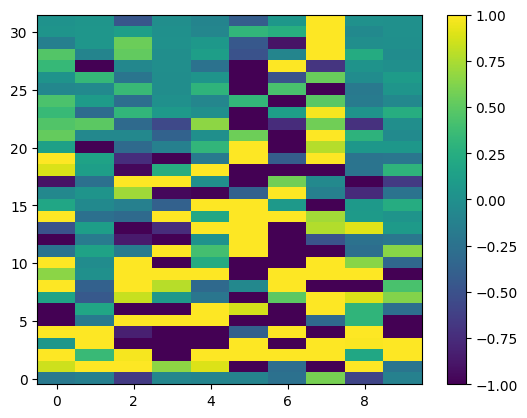

In [88]:
plt.imshow(μ,origin='lower',aspect=0.3)
plt.colorbar()
plt.clim((-1,1))

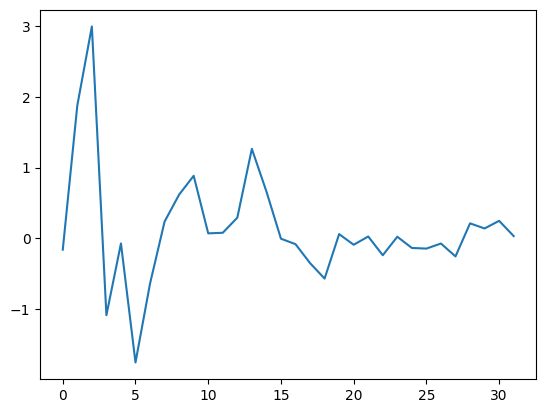

In [89]:
plt.plot(tf.reduce_mean(μ,axis=1))

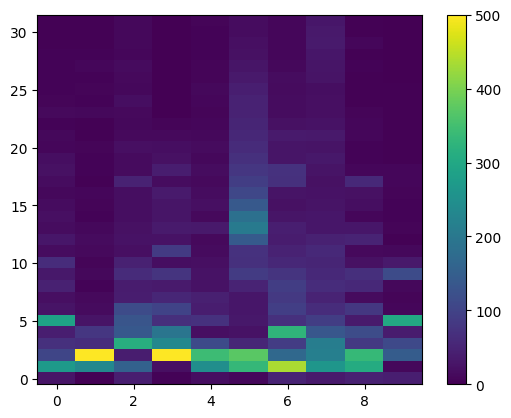

In [90]:
plt.imshow(σ,origin='lower',aspect=0.3)
plt.colorbar()
plt.clim((0,500))

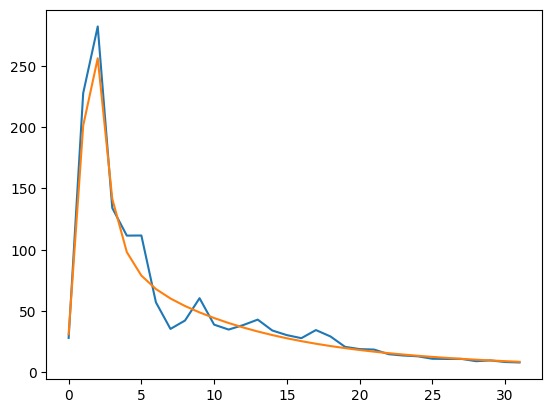

In [247]:
plt.plot(tf.reduce_mean(σ,axis=1))
z = tf.linspace(0,512,32)
plt.plot(σ_prior(z))

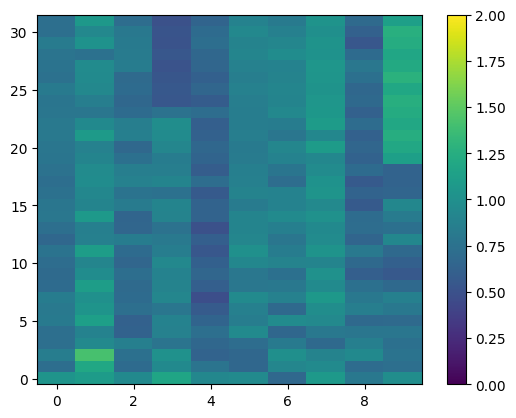

In [92]:
plt.imshow(γ,origin='lower',aspect=0.3)
plt.colorbar()
plt.clim((0,2))

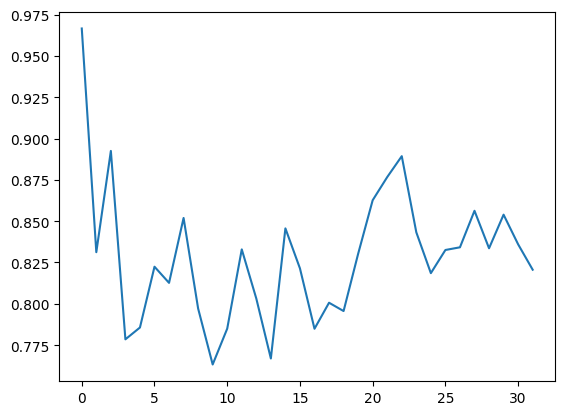

In [93]:
plt.plot(tf.reduce_mean(γ,axis=1))